# FEATURE EXTRACTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
X = digits.data
y = digits.target
df = pd.DataFrame(X)
df['y'] = y

In [5]:
# plt.imshow(df.loc[10, np.arange(0,64)].values.reshape(8, 8), cmap='gray_r')

In [6]:
def plot_digit(number,df):
    plt.imshow(df.loc[number, np.arange(0,64)].values.reshape(8, 8), cmap='gray_r')
    plt.title("Label:"+str(df.loc[number, 'y']))
    plt.colorbar()
    plt.show()
    return None

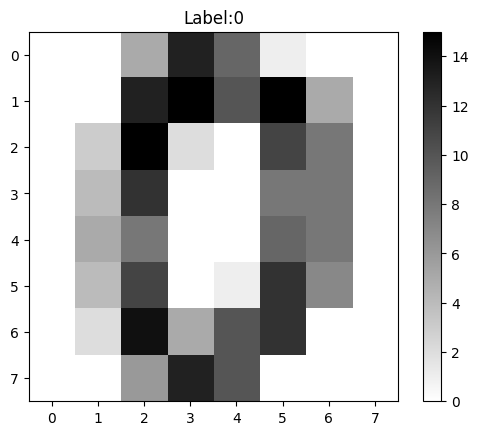

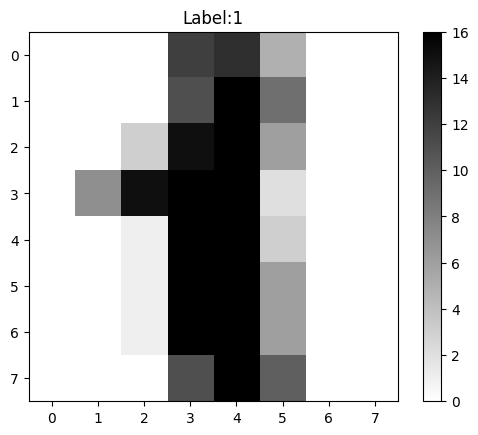

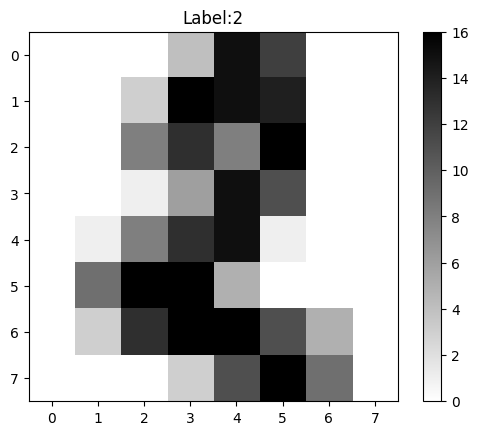

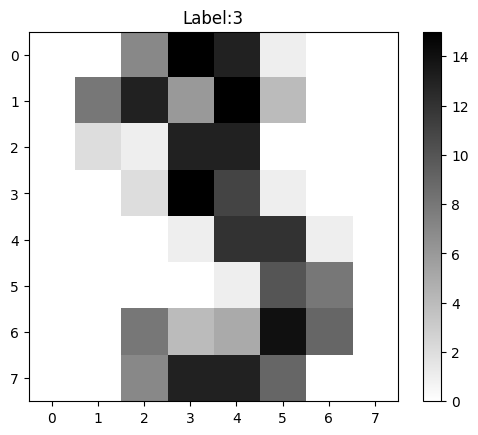

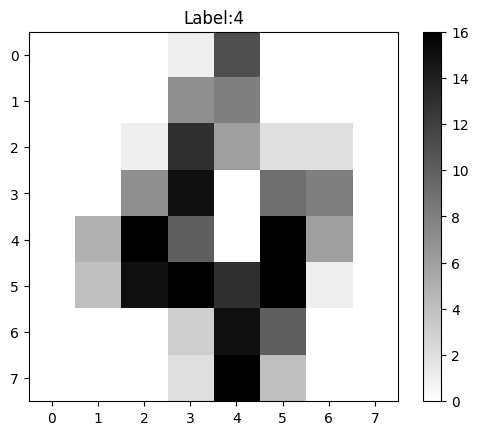

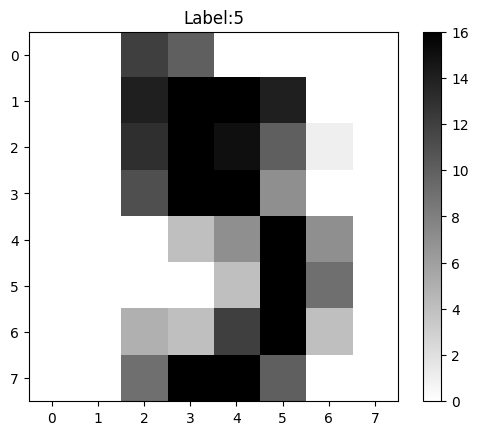

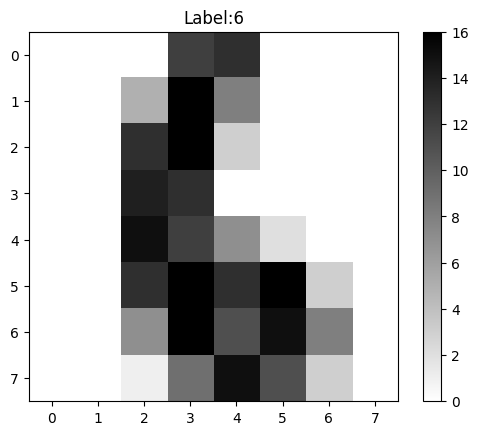

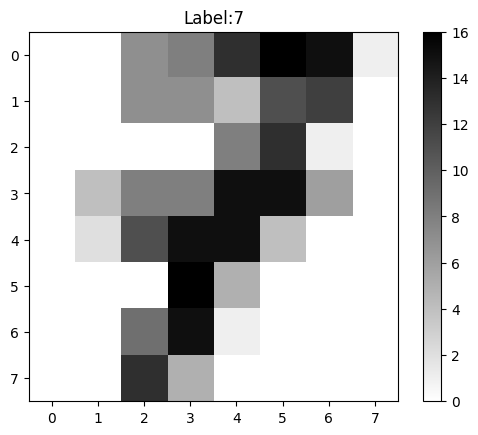

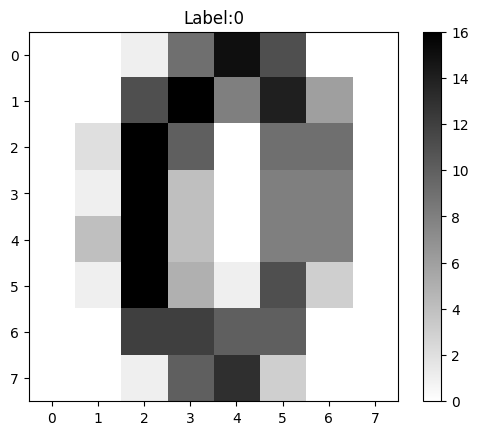

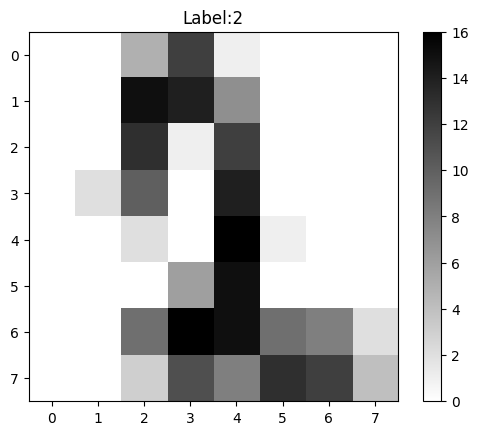

In [7]:
for i in range(13): 
    plot_digit(i,df)

## Két ábra a magyarázatokhoz


### PCA
<img src="pca.jpg" width="600" >

### TSNE
<img src="tsne.jpg" width="600" >

# PCA

In [8]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=64)
pca.fit(X)
pca.explained_variance_

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      

In [15]:
plt.plot(pca.explained_variance_.cumsum(), marker='.')

In [16]:
pca = PCA(n_components=2)
pca.fit(X)
pca_matrix = pca.transform(X)
df.loc[:, ["pca0", "pca1"]] = pca_matrix

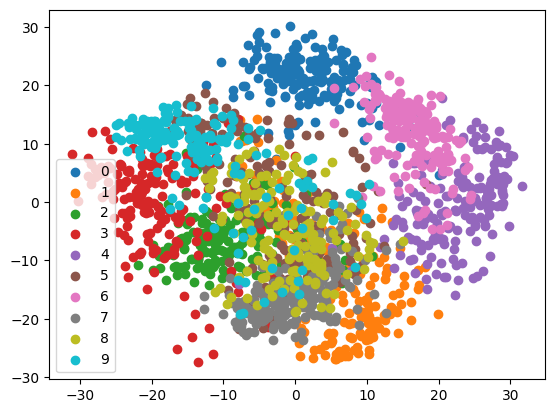

In [18]:
for digit in range(10):
    plt.scatter(df.loc[df['y']==digit, 'pca0'], df.loc[df['y']==digit, 'pca1'], label=digit)
plt.legend()
plt.show()

# Új dimenziók KMeans algoritmussal

In [20]:
from sklearn.cluster import KMeans

In [21]:
k = 10
kmeans = KMeans(random_state=0, n_clusters=k)
ujnevek=[]
for i in range(k):
    df["kmeans_c_"+str(i)] = 0;
    ujnevek.append("kmeans_c_"+str(i))

In [22]:
df[ujnevek] = kmeans.fit_transform(df.iloc[:, :64])
df[ujnevek].head()

/home/melidon/egyetem/msc/2_felev/gepi_tanulasi_esettanulmanyok/13_FeatureExtraction/.env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_c_0  kmeans_c_1  kmeans_c_2  kmeans_c_3  kmeans_c_4  kmeans_c_5  \
0   13.954707   44.766536   42.416388   46.583256   39.094512   41.742849   
1   54.164472   25.149644   39.888619   36.470265   43.551584   44.373336   
2   47.819923   30.993528   41.193796   40.097579   45.789442   43.335309   
3   44.163042   38.963737   45.017261   43.328865   22.659398   41.767456   
4   45.700947   42.692746   48.270332   40.946836   51.412727   40.173984   

   kmeans_c_6  kmeans_c_7  kmeans_c_8  kmeans_c_9  
0   40.601885   39.308859   32.322554   46.293225  
1   39.248089   41.116741   44.369977   38.271285  
2   43.949185   50.196677   45.488115   40.165655  
3   48.660745   39.537321   29.347536   32.653765  
4   27.742552   49.965986   48.432709   52.621341

In [23]:
for digit in range(10):
    plt.scatter(df.loc[df['y']==digit, 'kmeans_c_0'], df.loc[df['y']==digit, 'kmeans_c_1'], label=digit)
plt.legend()
plt.show()

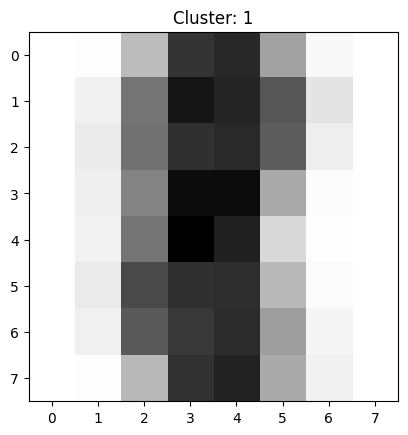

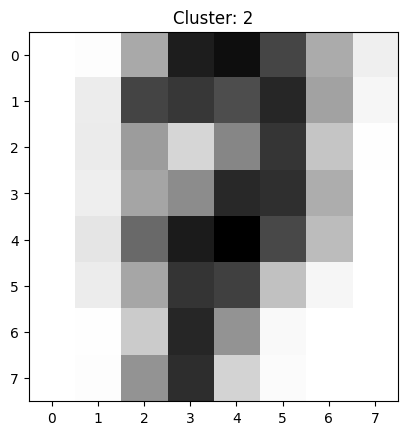

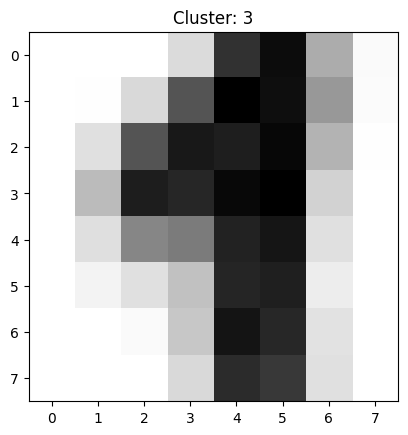

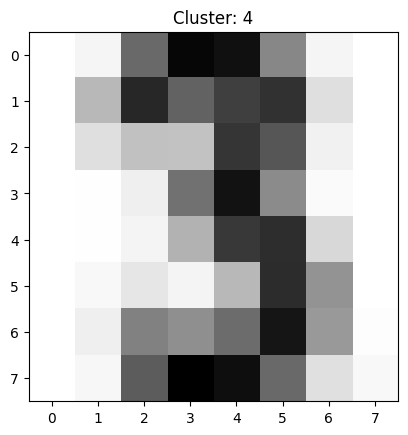

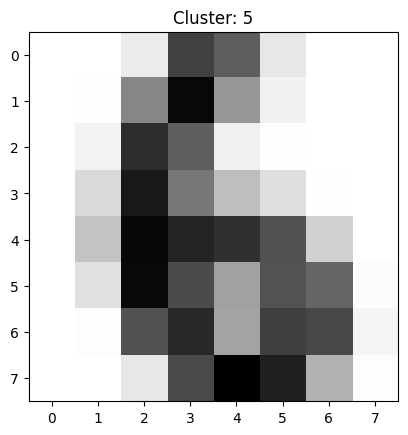

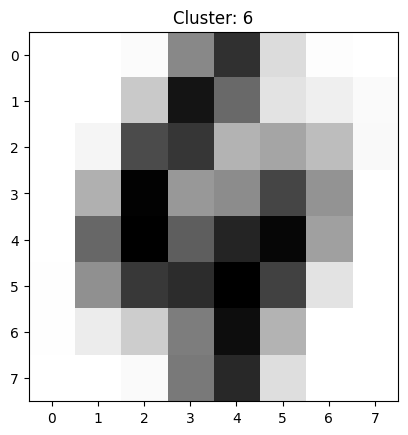

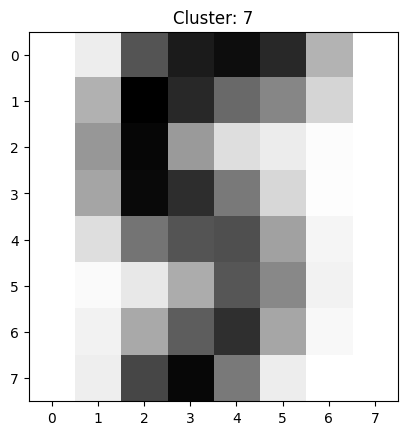

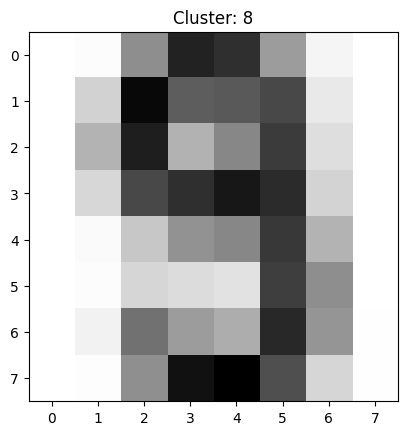

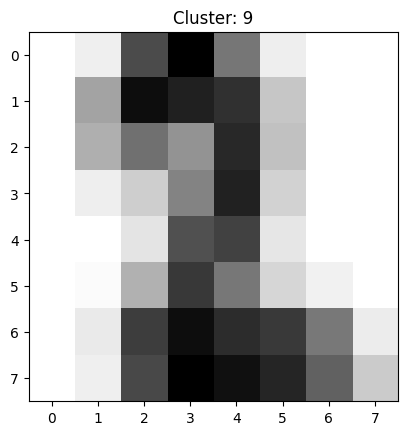

In [24]:
for i in range(kmeans.n_clusters):
    plt.title("Cluster: "+str(i))
    plt.imshow(kmeans.cluster_centers_[i].reshape(8, 8), cmap='gray_r')
    plt.show()

In [25]:
df.describe()

0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                 5            6            7            8            9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

        kmeans_c_0   kmeans_c_1   kmeans_c_2   kmeans_c_3   kmeans_c_4  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean     42.553994    38.993548    41.172067    44.689383    40.412920   
std       9.482417     6.620487     7.216366     7.039843     8.458254   
min      11.927832    15.212476    15.471001    15.995322    15.529927   
25%      39.307247    35.650680    37.805117    40.980929    35.350238   
50%      44.297806    40.123661    42.248076    45.068910    41.708445   
75%      48.669294    43.504576    46.291779    49.086714    46.349054   
max      59.348837    55.336619    56.236331    62.277648    57.087347   

        kmeans_c_5   kmeans_c_6   kmeans_c_7   kmeans_c_8   kmeans_c_9  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     42.691046    43.063237    40.767320    38.396274    41.818670  
std       8.830897     8.039709     6.337467     7.671714     7.789109  
min      12.720304    15.173886    17.546882    17.173754    15.661594  
25%      39.236303    39.135231    38.107389    33.123902    38.022472  
50%      43.970064    43.742030    41.666930    39.882705    42.374046  
75%      48.544684    48.970146    44.628239    44.402358    46.599262  
max      64.011963    60.106253    58.494328    53.473768    61.221937  

[8 rows x 77 columns]

# t-SNE (t-Distributed Stochastic Neighbour Embedding)

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=2, random_state=0)
tsne_matrix = tsne.fit_transform(X)
df.loc[:, ["tsne0", "tsne1"]] = tsne_matrix

In [30]:
def ketDrajzolo(df, v1, v2):
    plt.xlabel(v1)
    plt.ylabel(v2)
    for digit in range(10):
        plt.scatter(
            df.loc[df["y"] == digit, v1], df.loc[df["y"] == digit, v2], label=digit
        )
    plt.legend()

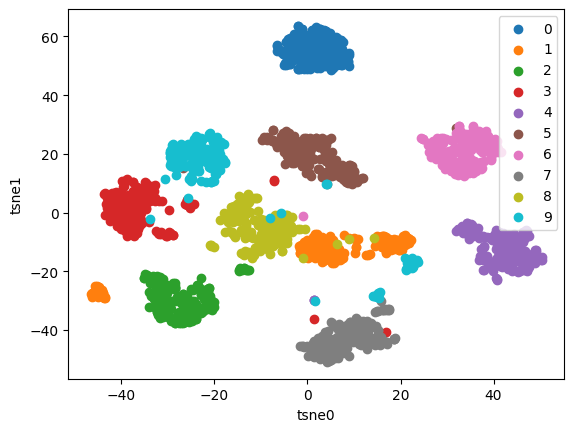

In [31]:
ketDrajzolo(df, "tsne0", "tsne1")

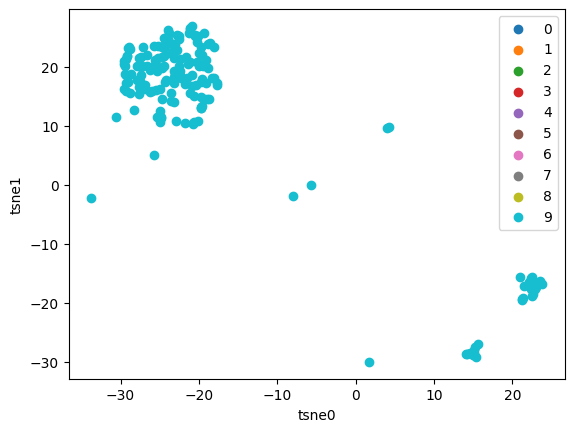

In [32]:
kilencesek = df[df["y"] == 9].copy()
ketDrajzolo(kilencesek, "tsne0", "tsne1")

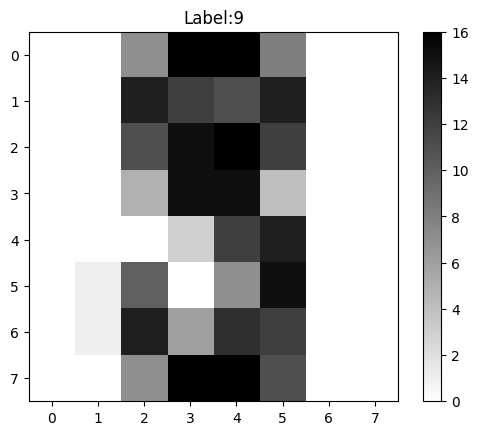

In [37]:
csopi = kilencesek[(kilencesek["tsne0"] < 0) & (kilencesek["tsne1"] < 0)]
plot_digit(2, csopi.reset_index(drop=True))

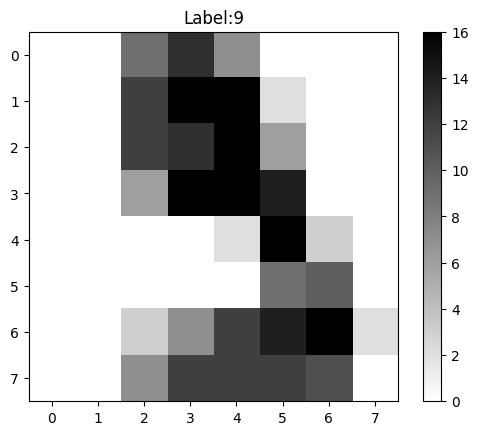

In [38]:
csopi2 = kilencesek[kilencesek["tsne1"] > 0]
plot_digit(2, csopi2.reset_index(drop=True))

# UMAP (Uniform Manifold Approcimation and Projection)

In [ ]:
# # https://pypi.org/project/umap-learn/
# import umap

# SVD - Singular Value Decomposition

In [39]:
from sklearn.decomposition import TruncatedSVD

In [40]:
svd = TruncatedSVD(n_components=2, random_state=0)
svd_matrix = svd.fit_transform(X)
df.loc[:, ["svd0", "svd1"]] = svd_matrix

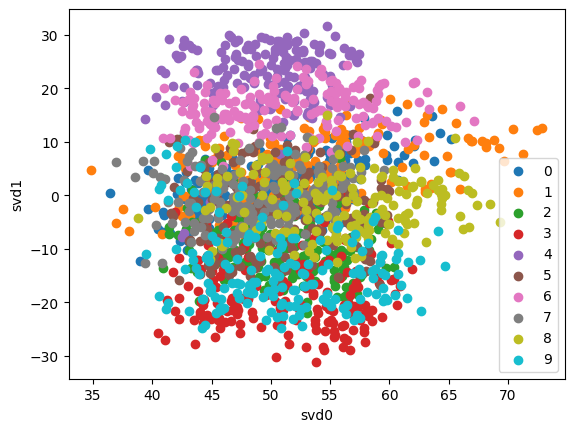

In [41]:
ketDrajzolo(df, "svd0", "svd1")

# PDP - Partial Dependence Plot (sklearn implementáció nem olyan jó)

In [44]:
extras = [
    "pca0",
    "pca1",
    "kmeans_c_0",
    "kmeans_c_1",
    "kmeans_c_2",
    "kmeans_c_3",
    "kmeans_c_4",
    "kmeans_c_5",
    "kmeans_c_6",
    "kmeans_c_7",
    "kmeans_c_8",
    "kmeans_c_9",
    "tsne0",
    "tsne1",
    "svd0",
    "svd1",
]

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
X_train, X_test, y_train, y_test = (
    df.loc[:999, extras],
    df.loc[1000:, extras],
    df.loc[:999, "y"],
    df.loc[1000:, "y"],
)

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)